In [1]:
import pandas as pd
from scipy.stats import spearmanr, kendalltau, linregress
import matplotlib.pyplot as plt


In [2]:
AL_IMAGE = 'https://s3.amazonaws.com/openneuro.org/ds004515/participants.tsv?versionId=OX_rM1XL_frHnMPy12BwJttx3nN3k8kn'
AL_IMAGE = pd.read_csv(AL_IMAGE, sep='\t')
AL_IMAGE.to_csv('data_ds004515/AL_IMAGE_dataset_ds004515.csv', sep=',', index=False)

In [4]:
suda = pd.read_csv('data_ds004515/SUDA_ds004515.csv', sep=',')
pif = pd.read_csv('data_ds004515/PIF_ds004515.csv', sep=',',index_col='Unnamed: 0').sort_index()
#suda_field_score =  pd.read_csv('data_ds004515/att_suda.csv', sep=',').drop(columns=['Unnamed: 0'], errors='ignore')
#k_combined_field =  pd.read_csv('data_ds004515/normalized_difference.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})
#k_combined_all = pd.read_csv('data_ds004515/k-combined-all-2-11.csv', sep=',')


In [5]:
import sys
sys.path.append("..")  
import ST_calc as ST
from ST_calc import plot_calc

In [6]:
na_percentage = AL_IMAGE.isna().mean() * 100
na_percentage = na_percentage[na_percentage >= 10].sort_values(ascending=False)
na_percentage

Series([], dtype: float64)

In [8]:
# Spearman Rank Correlation
correlation_spearman, _ = spearmanr(suda['dis-score'], pif['RIG'])
print(f"Spearman Rank Correlation between suda & pif: {correlation_spearman:.2f}")  
    
# Kendall's Tau Correlation
tau, p_value = kendalltau(suda['dis-score'], pif['RIG'])
print(f"Kendall's Tau between suda & pif: {tau:.2f}, p-value: {p_value:.4f}")

Spearman Rank Correlation between suda & pif: 0.68
Kendall's Tau between suda & pif: 0.56, p-value: 0.0000


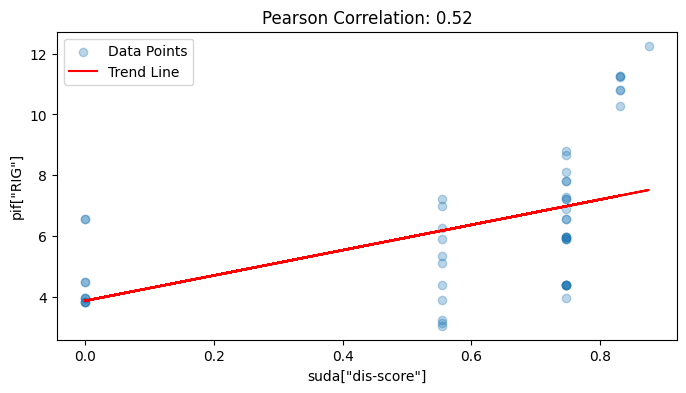

In [17]:
correlation_pearson = suda['dis-score'].corr(pif['RIG'])
    
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(suda['dis-score'], pif['RIG'], alpha=0.3, label='Data Points')
    

slope, intercept, _, _, _ = linregress(suda['dis-score'], pif['RIG'])
ax.plot(suda['dis-score'], slope * suda['dis-score'] + intercept, color='red', label='Trend Line')
    
ax.set_title(f'Pearson Correlation: {correlation_pearson:.2f}')
ax.set_xlabel('suda["dis-score"]')
ax.set_ylabel('pif["RIG"]')
ax.grid(False)
ax.legend()
    
plt.show()    

In [6]:
AL_IMAGE['GROUP'].value_counts()

ALC    28
CTL    26
Name: GROUP, dtype: int64

In [7]:
AL_IMAGE


,participant_id,Original_ID,sex,age,GROUP,BDI,AUDIT,EDUCATION
0,sub-001,10600,F,43,CTL,14,1,16
1,sub-002,10601,F,50,CTL,2,2,16
2,sub-003,10602,F,22,CTL,2,1,18
3,sub-004,10603,F,18,CTL,0,1,13
4,sub-005,10604,M,31,CTL,1,1,14
5,sub-006,10605,F,24,CTL,8,3,19
6,sub-007,10606,M,44,ALC,5,7,16
7,sub-008,10607,M,38,ALC,42,27,13
8,sub-009,10608,M,32,ALC,1,11,16
9,sub-010,10609,F,54,ALC,17,9,12
